IMPORTING SOME LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

Load the Dataset

In [ ]:
df= pd.read_csv('/content/questions.csv')

In [ ]:
df.shape

(404351, 6)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
df.shape

(404348, 6)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['is_duplicate'].value_counts()

is_duplicate
0    255042
1    149306
Name: count, dtype: int64

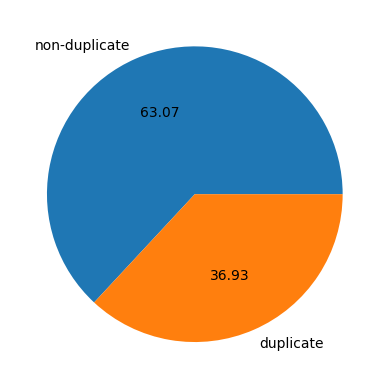

In [ ]:
# Distribution of duplicate and non-duplicate questions

plt.pie(df['is_duplicate'].value_counts(),labels=['non-duplicate','duplicate'],autopct='%0.2f')
plt.show()

In [ ]:
# Feature Engineering

df['q1_len']= df['question1'].str.len()
df['q2_len']= df['question2'].str.len()

In [ ]:
df['q1_num_words']= df['question1'].apply(lambda x: len(x.split(' ')))
df['q2_num_words']= df['question2'].apply(lambda x: len(x.split(' ')))

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7


In [ ]:
def common_words(data):
    # Split the string in 'question1' into a set of unique, cleaned words
    w1 = set(map(lambda x: x.lower().strip(), data['question1'].split(" ")))

    # Split the string in 'question2' into a set of unique, cleaned words
    w2 = set(map(lambda x: x.lower().strip(), data['question2'].split(" ")))

    # Find the intersection of the two sets of words to get common words
    common_words = w1 & w2

    # Return the count of common words found
    return len(common_words)



In [ ]:
df['common_word']= df.apply(common_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2


In [ ]:
def total_words(data):

    w1 = set(map(lambda x: x.lower().strip(), data['question1'].split(" ")))
    w2 = set(map(lambda x: x.lower().strip(), data['question2'].split(" ")))
    total_words = len(w1) + len(w2)

    return (total_words)



In [ ]:
df['total_words']= df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,19
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20


In [ ]:
df['word_share']= round(df['common_word']/df['total_words'],4)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_words,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23,0.4348
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20,0.2000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24,0.1667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,19,0.0000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20,0.1000


Exploratory Data Analysis

Text(0.5, 1.0, 'Question1 len')

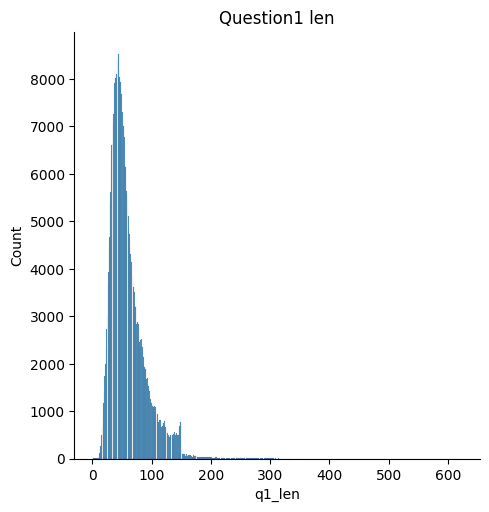

In [ ]:
# Analysis of features

sns.displot(df['q1_len'])
plt.title('Question1 len')

Text(0.5, 1.0, 'Question2 len')

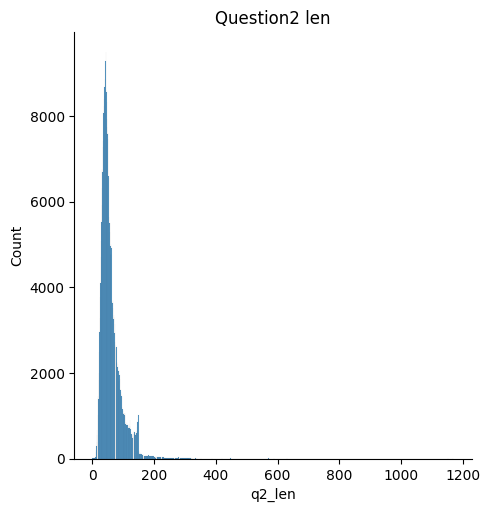

In [ ]:

sns.displot(df['q2_len'])
plt.title('Question2 len')

Text(0.5, 1.0, 'Question1 number of words')

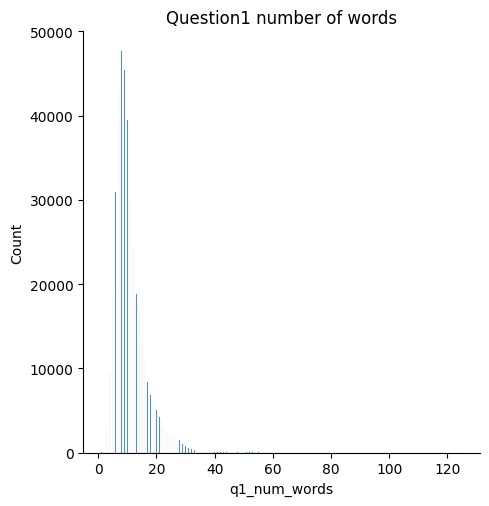

In [ ]:

sns.displot(df['q1_num_words'])
plt.title('Question1 number of words')

Text(0.5, 1.0, 'Question2 number of words')

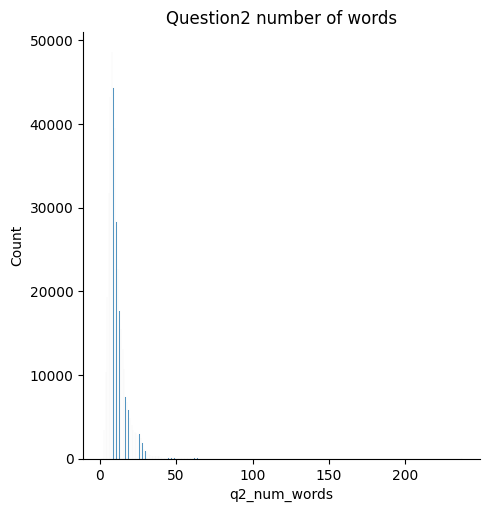

In [ ]:
sns.displot(df['q2_num_words'])
plt.title('Question2 number of words')

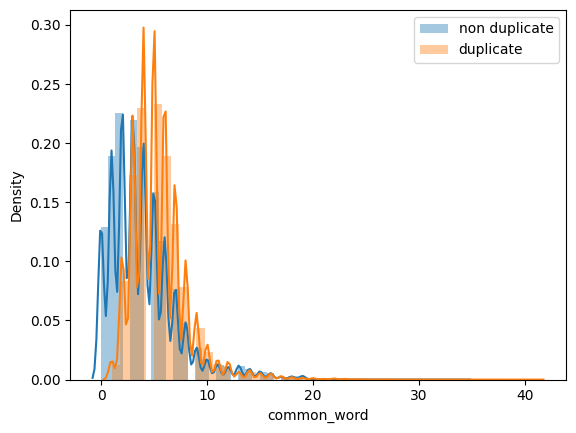

In [ ]:
# common words
sns.distplot(df[df['is_duplicate']==0]['common_word'],label='non duplicate')
sns.distplot(df[df['is_duplicate']==1]['common_word'],label='duplicate')
plt.legend()
plt.show()


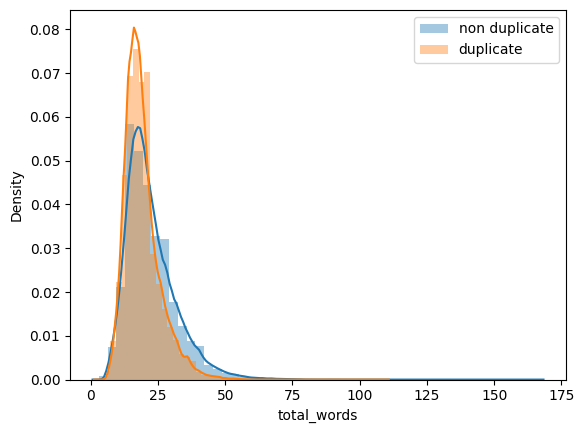

In [ ]:
# total words
sns.distplot(df[df['is_duplicate']==0]['total_words'],label='non duplicate')
sns.distplot(df[df['is_duplicate']==1]['total_words'],label='duplicate')
plt.legend()
plt.show()


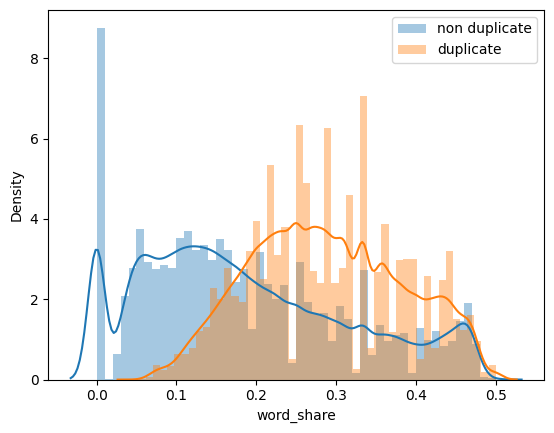

In [ ]:
# word share
sns.distplot(df[df['is_duplicate']==0]['word_share'],label='non duplicate')
sns.distplot(df[df['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()


Split the data

In [ ]:
 df1 = df[['question1','question2']]
 df2 = df.drop(['id','qid1','qid2','question1','question2'],axis=1)

In [ ]:
df1.head()

,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [ ]:
df2.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_words,word_share
0,0,66,57,14,12,10,23,0.4348
1,0,51,88,8,13,4,20,0.2000
2,0,73,59,14,10,4,24,0.1667
3,0,50,65,11,9,0,19,0.0000
4,0,76,39,13,7,2,20,0.1000


#Merge texts

CountVectorizer is a key component in natural language processing (NLP) workflows, particularly in text preprocessing and feature extraction tasks.

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer

questions = list(df1['question1']) + list(df1['question2'])

cv = CountVectorizer(max_features=3000)
q1_array,q2_array = np.vsplit(cv.fit_transform(questions).toarray(),2)


In [ ]:
temp_df1 = pd.DataFrame(q1_array,index =df1.index)
temp_df2 = pd.DataFrame(q2_array,index =df1.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(404348, 100)

In [ ]:
df = pd.concat([df2,temp_df],axis=1)
df.shape
df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_words,word_share,0,1,...,40,41,42,43,44,45,46,47,48,49
0,0,66,57,14,12,10,23,0.4348,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,51,88,8,13,4,20,0.2000,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,73,59,14,10,4,24,0.1667,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,50,65,11,9,0,19,0.0000,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,76,39,13,7,2,20,0.1000,0,0,...,0,0,1,0,0,0,0,1,0,0


Separate Target feature

In [ ]:
x = df.drop(['is_duplicate'],axis=1).values
y = df['is_duplicate'].values

Split the data into train data and test data

In [ ]:
#from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

Model Implementation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7959564733522938